# Carga de datos y preparación del espacio de trabajo.
## Cargamos las bibliotecas / librerías que utilizamos
## Definimos las funciones user-defined que hemos necesitado

In [2]:
# Preparamos el espacio de trabajo
# setwd('/Users/agus/Downloads/mdbd-master-3/proyecto_final')
setwd('C:/Users/ealcober/git/mdbd/mdbd/proyecto_final')
# para trabajar con ficheros excel
if(!require("XLConnect"))install.packages("XLConnect") 
library(XLConnect)

# dep 1
if(!require("dplyr"))install.packages("dplyr") 
library(dplyr)

# dep 2
if(!require("ggplot2"))install.packages("ggplot2") 
library(ggplot2)

if(!require("caTools"))install.packages("caTools", repos = "http://cran.us.r-project.org")
library(caTools)

# dep 3
if(!require("RColorBrewer"))install.packages("RColorBrewer") 
library(RColorBrewer)

# Función para eliminar fila por índice
removeRowByIndex <- function(x, row_index) {
  nr <- nrow(x)
  if (nr < row_index) {
    print('row_index exceeds number of rows')
  } else if (row_index == 1)
  {
    return(x[2:nr, ])
  } else if (row_index == nr) {
    return(x[1:(nr - 1), ])
  } else {
    return (x[c(1:(row_index - 1), (row_index + 1):nr), ])
  }
}

# Funcion que convierte a 0's los NAs
haz.cero.na=function(x){
  ifelse(is.na(x),0,x)}

Loading required package: XLConnect
Warning message:
"package 'XLConnect' was built under R version 3.5.2"Loading required package: XLConnectJars
Warning message:
"package 'XLConnectJars' was built under R version 3.5.2"XLConnect 0.2-15 by Mirai Solutions GmbH [aut],
  Martin Studer [cre],
  The Apache Software Foundation [ctb, cph] (Apache POI),
  Graph Builder [ctb, cph] (Curvesapi Java library)
http://www.mirai-solutions.com
https://github.com/miraisolutions/xlconnect
Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.2"Loading required package: caTools
Warning message:
"package 'caTools' was built under R version 3.5.3"Loading required package

# Nuestra hipótesis inicial:

## Queremos encontrar, si existe, una relación entre el nivel educativo de la población y el nivel de uso de plástico y su gestión en el rango de años 1960-2010.

## De forma intuitiva, ante el incremento del efecto invernadero y la cantidad de plástico producida industrialmente, una población con mejor formación y educación habría de ser más eficiente en el tratamiento de residuos, o en sus elecciones a la hora de escoger en sus compras, otro tipo de residuos no plásticos.

# Comenzamos exponiendo brevemente unas cifras que ilustran la Producción de plástico global en Toneladas, en serie temporal, sobre la gráfica de "media de años que un adulto pasa escolarizado" a lo largo de los años estudiados.

,Year,Prod de plastico global
61,2010,313000000
62,2011,325000000
63,2012,338000000
64,2013,352000000
65,2014,367000000
66,2015,381000000


,Entity,Code,Year,TotalYearsAtSchool
3214,Zimbabwe,ZWE,1985,4.84
3215,Zimbabwe,ZWE,1990,5.97
3216,Zimbabwe,ZWE,1995,6.85
3217,Zimbabwe,ZWE,2000,7.26
3218,Zimbabwe,ZWE,2005,7.65
3219,Zimbabwe,ZWE,2010,7.86


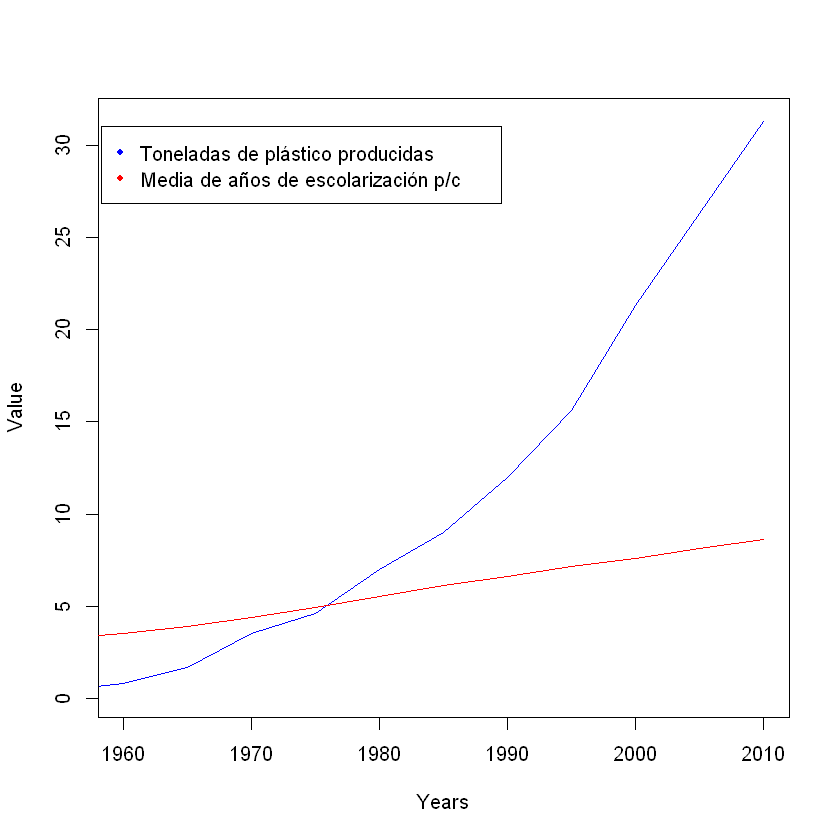

In [19]:

gpp<-read.csv('sources/global-plastics-production.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)
sch<-read.csv('sources/mean-years-of-schooling-selected-countries.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)

gpp$Entity <- NULL
gpp$Code <- NULL

# Arreglamos los nombres de las variables 
colnames(gpp) <- c("Year", "Prod de plastico global")
colnames(sch) <- c("Entity", "Code", "Year", "TotalYearsAtSchool")

# Sumamos por año, calculando la media de años que pasa escolarizada cada persona
schmean<-aggregate.data.frame(sch$TotalYearsAtSchool ,list(sch$Year), FUN=mean)
colnames(schmean) <- c("Year", "mean escolarizados")
prueba <- merge(gpp, schmean, by.y="Year", sort = TRUE)

# Dividimos las cantidades a x10 toneladas (1 unidad son 10 toneladas) por proporcionalidad con la otra magnitud
prueba$`Prod de plastico global` <- prueba$`Prod de plastico global` / 10000000

# Imprimimos la tabla y el gráfico con su leyenda correspondiente.
# Muestra de ambas tablas
tail(gpp)
tail(sch)
plot(prueba$Year,prueba$`Prod de plastico global`,type="l",col="blue", 
     xlim=c(1960,2010), xlab="Years", ylab="Value")
lines(prueba$Year,prueba$`mean escolarizados`,col="red")

legend("bottomleft", legend=c("Toneladas de plástico producidas", "Media de años de escolarización p/c"),
      col=c("blue", "red"),
      pch=c(20,20),
       inset=c(0.005,0.83)
      )



# vamos a buscar una relación entre ambas variables, colocándolas en ambos ejes respectivos x e y en una gráfica de 2d.

Prod de plastico global,mean escolarizados
2000000,3.026036
4000000,3.253243
8000000,3.516486
17000000,3.878198
35000000,4.411892
46000000,4.949279
70000000,5.547838
90000000,6.095315
120000000,6.636126
156000000,7.155495


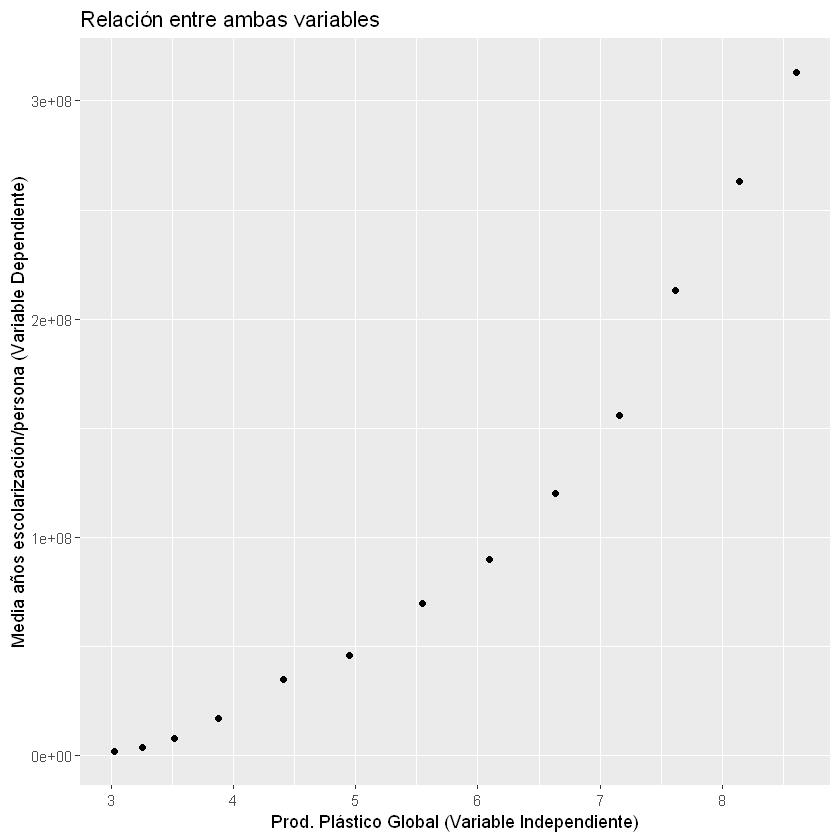

In [63]:
# agrupación de ambas tablas por año
prueba <- merge(gpp, schmean, by.y="Year", sort = TRUE)



prueba<-prueba[,-1]
prueba
colnames(prueba) <- c('y', 'x')
ggplot() + geom_point(data = prueba, aes(x = prueba$x, y = prueba$y)) + 
  xlab("Prod. Plástico Global (Variable Independiente)") + 
  ylab("Media años escolarización/persona (Variable Dependiente)") + 
  ggtitle("Relación entre ambas variables")

# De forma contraria a como esperábamos la proporción aumenta:
# A lo largo de los años ha ido aumentando el tiempo medio que una persona pasa escolarizada en su vida, y proporcionalmente a éste, la cantidad de plástico total producido en esos años.

# Vamos a tratar de aproximarnos para predicciones posteriores mediante regresión: partimos el conjunto de nuestros datos en 70% prueba y 30% entrenamiento


In [97]:
split = sample.split(prueba$y, SplitRatio = 0.7)
nltrain = subset(prueba, split == TRUE)
nltest = subset(prueba, split == FALSE)
nltest
nltrain

,y,x
1,2000000,3.026036
3,8000000,3.516486
8,90000000,6.095315
13,313000000,8.607477


,y,x
2,4000000,3.253243
4,17000000,3.878198
5,35000000,4.411892
6,46000000,4.949279
7,70000000,5.547838
9,120000000,6.636126
10,156000000,7.155495
11,213000000,7.612883
12,263000000,8.139279


In [105]:
nltrain$x2 <- nltrain$x^2
str(nltrain)

'data.frame':	9 obs. of  4 variables:
 $ y : int  4000000 17000000 35000000 46000000 70000000 120000000 156000000 213000000 263000000
 $ x : num  3.25 3.88 4.41 4.95 5.55 ...
 $ x2: num  10.6 15 19.5 24.5 30.8 ...
 $ x3: num  34.4 58.3 85.9 121.2 170.8 ...


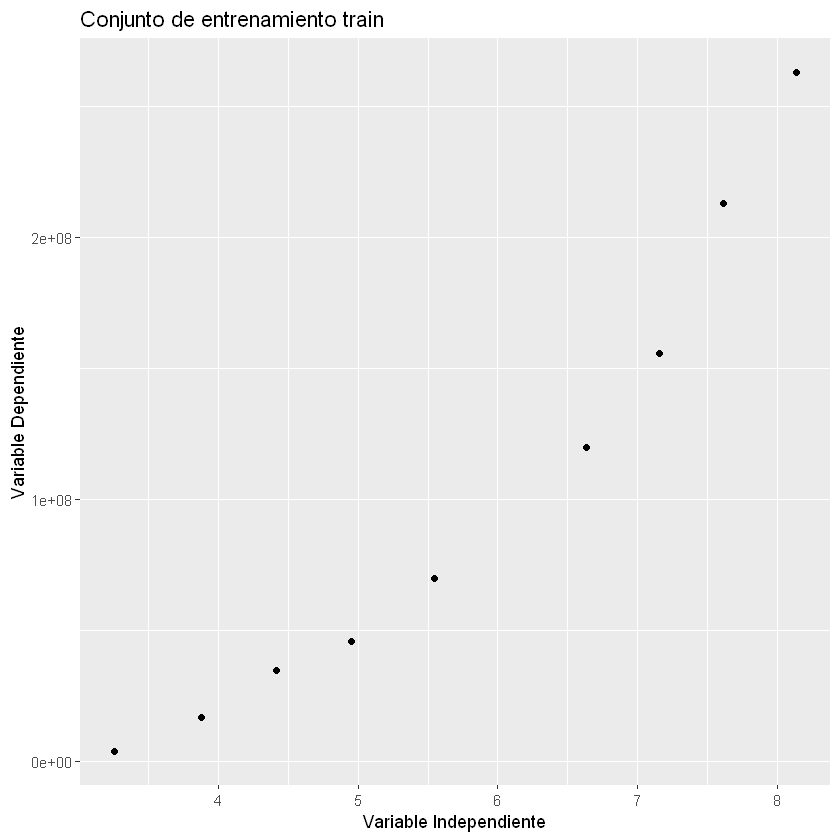

In [111]:
ggplot() + geom_point(data = nltrain, aes(x = nltrain$x, y = nltrain$y)) + 
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Conjunto de entrenamiento train")

In [112]:
set.seed(1234)
regresion_poly <- lm(y ~ x + x2, data = nltrain)

In [113]:
summary(regresion_poly)


Call:
lm(formula = y ~ x + x2, data = nltrain)

Residuals:
      Min        1Q    Median        3Q       Max 
-12541452  -7450155   3472106   5886041   9044822 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 115830569   45205721   2.562  0.04278 *  
x           -64975114   16769599  -3.875  0.00822 ** 
x2           10109936    1454659   6.950  0.00044 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9092000 on 6 degrees of freedom
Multiple R-squared:  0.9926,	Adjusted R-squared:  0.9901 
F-statistic:   402 on 2 and 6 DF,  p-value: 4.064e-07


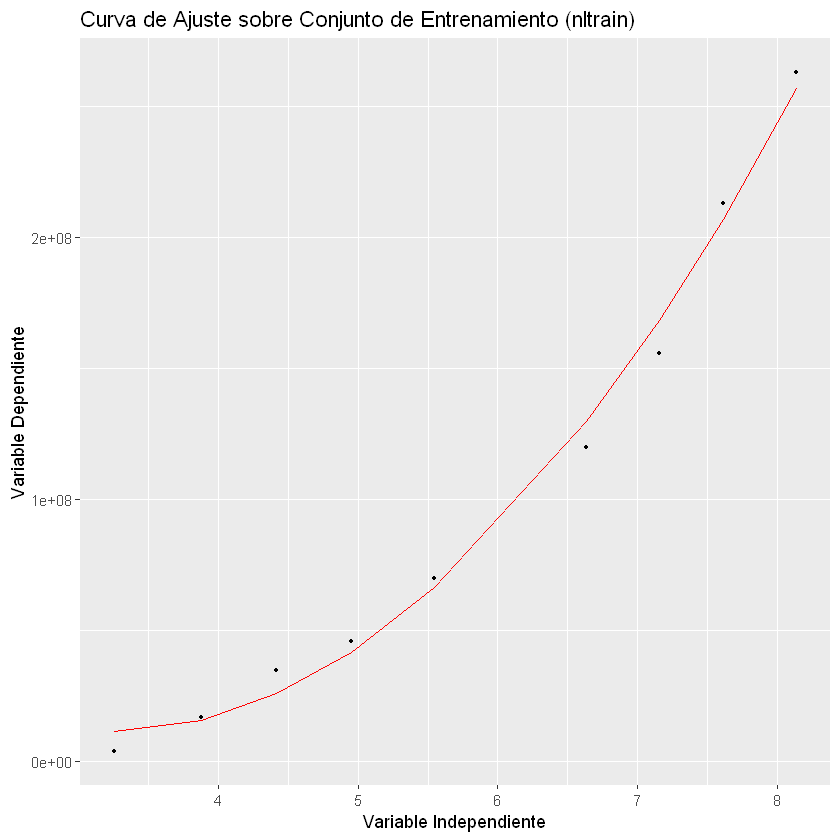

In [114]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + geom_point(data = nltrain, aes(x = nltrain$x, y = nltrain$y), size = 0.7) + 
  geom_line(aes( x = nltrain$x, y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

In [109]:
nltrain$x3 <- nltrain$x^3
regresion_poly <- lm(y ~ x + x2 + x3, data = nltrain)
summary(regresion_poly)


Call:
lm(formula = y ~ x + x2 + x3, data = nltrain)

Residuals:
       2        4        5        6        7        9       10       11 
  837590 -2697443  2169332 -1232320  2897703 -2336388 -5342464  8558645 
      12 
-2854655 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -222594427   97537915  -2.282   0.0713 .
x            132506746   55686970   2.379   0.0632 .
x2           -26386303   10169187  -2.595   0.0486 *
x3             2147542     596336   3.601   0.0155 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5254000 on 5 degrees of freedom
Multiple R-squared:  0.9979,	Adjusted R-squared:  0.9967 
F-statistic:   807 on 3 and 5 DF,  p-value: 3.926e-07


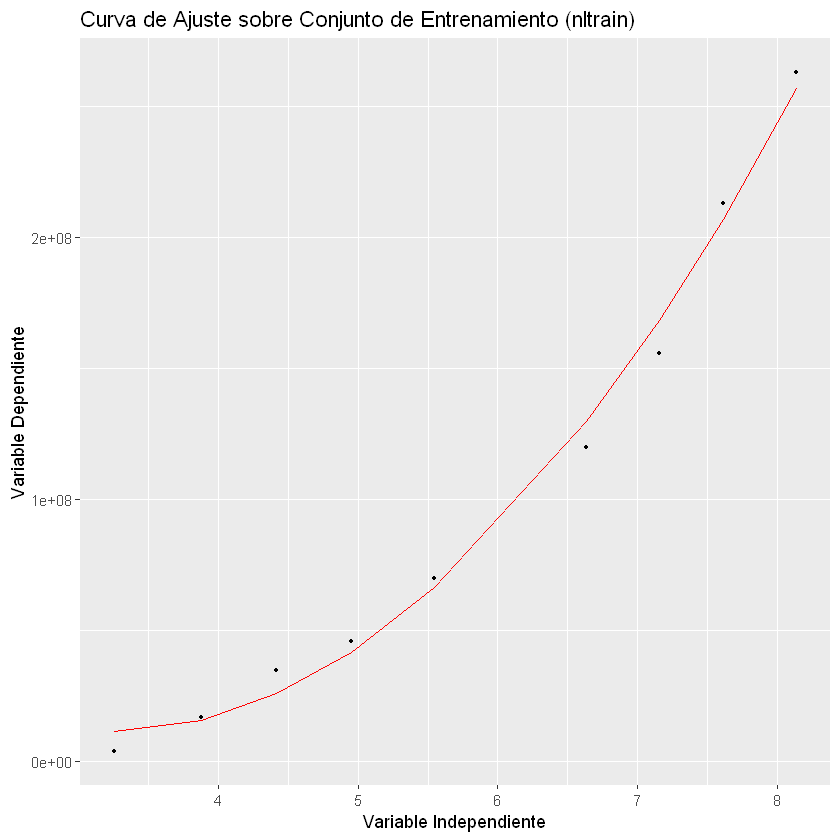

In [115]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + 
geom_point(data = nltrain, aes(x = nltrain$x, y = nltrain$y), size = 0.9) + 
geom_line(aes( x = nltrain$x, y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

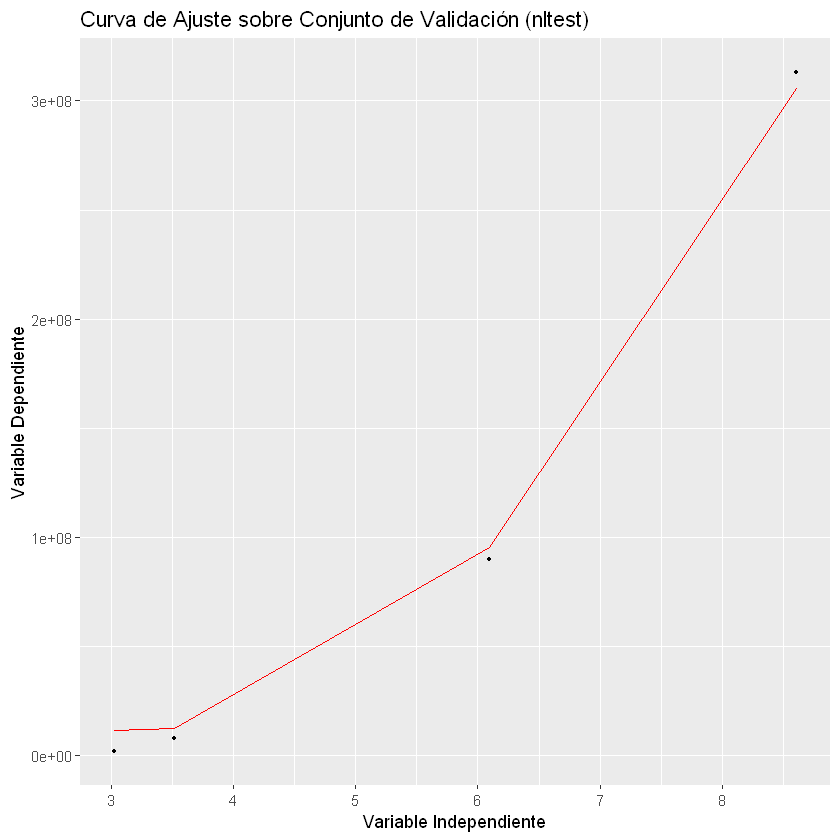

In [116]:
# data <- data.frame(x=seq(from=31.3e6,to=60e6, by=1e6))
# data2<-data.frame(cbind(data,data^2,data^3))
# colnames(data2)<-c("x","x2","x3")
# data2
# predYears <- predict(regresion_poly,newdata=data2)
# nltest<-nltest[rep(seq_len(nrow(nltest)), each=2),]
# nltest<-rbind(nltest,nltest[2,])
# nltest
# 


# ?predict
nltest$x2 <- nltest$x^2
nltest$x3 <- nltest$x^3
y_poly_test_predict <- predict(regresion_poly, nltest)

ggplot() + geom_point(data = nltest, aes(x = x, y = y), size = 0.9) + 
  geom_line(aes( x = nltest$x, y = y_poly_test_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Validación (nltest)")

In [117]:
predict_value_poly <- predict(regresion_poly, data.frame(x = 15,
                                                         x2 = 15^2,
                                                         x3 = 15^3))
predict_value_poly

1 
1415939523